# Guía Definitiva para Pandas

- Creador: &emsp;&emsp;&emsp;&emsp;&emsp; Ricardo Recarey Fernández [(LinkedIn)](https://www.linkedin.com/in/richyrecarey/)
- Creación: &emsp;&emsp;&emsp;&emsp;&emsp;2019-10-15 
- Última modificación: &nbsp;2019-10-15

In [58]:
# <a name="introduction"></a>
# <a name="slicing"></a>
# [To Some Internal Section](another_notebook.ipynb#section_id2)

# Table of contents
1. [Introduction](#introduction)
1. [Matplotlib basics](#basics)


In [58]:
# Carga de librerías necesarias

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.pylab import rcParams
import matplotlib.dates as mdates
import matplotlib
matplotlib.style.use('ggplot')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator,LinearLocator)

In [3]:
print(f"matplotlib version: {matplotlib.__version__}")

matplotlib version: 3.0.3


<a name="introduction"></a>

# 1. Introdución

Matplotlib es la librería más conocida y con más contribuidores en el ecosistema data science de python.

In [21]:
# Creacion de datos desde un dictionary
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Richy', 'Josh'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Recarey','Brown'], 
        'age': [42, 52, 36, 24, 73,12,19], 
        'preTestScore': [4, 24, 31, 2, 3,21,9],
        'postTestScore': [25, 94, 57, 62, 70,21,10],
        'school_ID': [10,12,3,4,5,2,1],
        'Birthday':['1994-02-19','1982-02-07','1987-09-11','1992-08-02','1994-05-04', '1992-03-03','2000-09-12']}

# La creacion es directa, con los nombres de la columna inferido
# Ambas versiones son correctas
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore', 'Birthday'])
df = pd.DataFrame(raw_data)
print(df.head(4))

date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
df_ts = pd.DataFrame(date_rng, columns=['date'])
df_ts['data'] = np.random.randint(0,100,size=(len(date_rng)))
df_ts = df_ts.set_index('date')
print(df_ts.head(5))

  first_name last_name  age  preTestScore  postTestScore  school_ID  \
0      Jason    Miller   42             4             25         10   
1      Molly  Jacobson   52            24             94         12   
2       Tina       Ali   36            31             57          3   
3       Jake    Milner   24             2             62          4   

     Birthday  
0  1994-02-19  
1  1982-02-07  
2  1987-09-11  
3  1992-08-02  
                     data
date                     
2018-01-01 00:00:00    71
2018-01-01 01:00:00    17
2018-01-01 02:00:00    35
2018-01-01 03:00:00    41
2018-01-01 04:00:00     1


<a name="basics"></a>

# 2. Tipos de plots básicos

## 2.1. Time Serie

El atajo **fig, ax(es) = plt.subplots()** devuelve una tupla que contiene una figura (todo, el objeto genérico que representa la figura en sí), y los objetos de 'ejex' (cada uno de los pares de ejes).

- En fig puedes cambiar cosas al nivel de **figura**, como por ejemplo atributos generales, o guardar la imagen a un png. 
- Con axes puedes cambiar cosas a nivel de cada par de ejes.

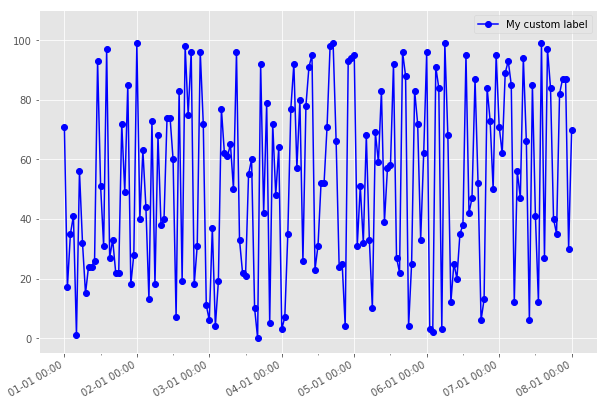

In [34]:
rcParams['figure.figsize'] = 10, 7
fig, ax = plt.subplots()

aux, = ax.plot(df_ts,
               '-o',
               color="blue",
               label = "My custom label")

## También válido
# aux, = ax.plot(df_ts.index, df_ts.data,
#                '-o',
#                color="blue",
#                label = "My custom label")

myFmt = DateFormatter("%d-%m %H:%M")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour = range(0,24,12)))

axes = plt.gca()
axes.set_ylim([-5,110])

## Rotate date labels automatically
fig.autofmt_xdate()
plt.legend()
plt.show()

## 2.1. Scatter

In [51]:
x = df.age
y = df.preTestScore

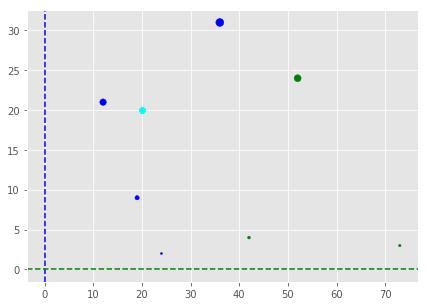

In [52]:
rcParams['figure.figsize'] = 7, 5
colores = np.where(df.age > 40, "green", "blue")
tamaños = df.preTestScore * 2
plt.scatter(x, 
            y,
           c = colores,
           s = tamaños)
plt.plot(20, 20, 'yo',color='cyan')
plt.axvline(0,color="blue",linestyle="dashed")
plt.axhline(0, color = "green",linestyle="dashed")

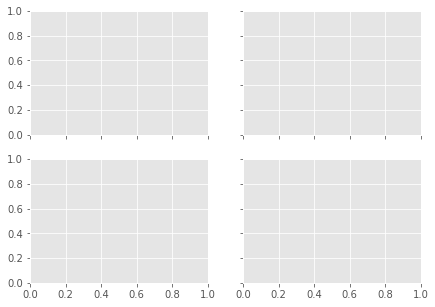

In [53]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

## 2.3. Varias plots en la misma figura

##### Verticalmente

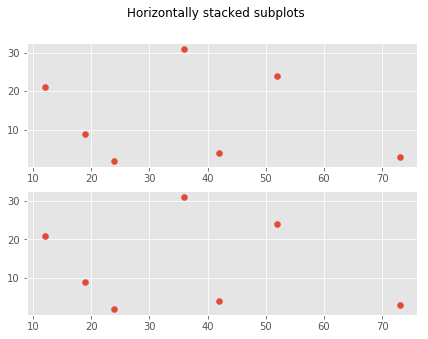

In [54]:
fig, axs = plt.subplots(2) # Vertical
fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(x, y, marker = 'o')
axs[1].scatter(x, y, marker = 'o')

##### Horizontalmente + tickz

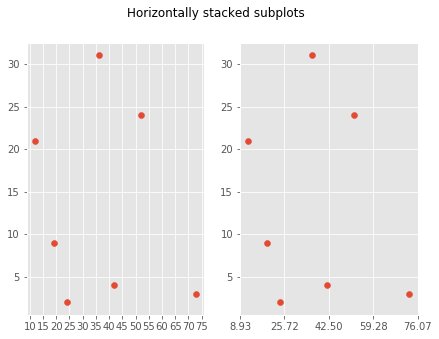

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2) # Horizontal
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(x, y, marker = 'o')
ax2.scatter(x, y, marker = 'o')

# Vamos a modificar cosas de uno
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_major_locator(LinearLocator(numticks = 5))